# ANZ Chengdu Data Science Compertition

### Data

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

You will need to download the dataset with all examples and 20 inputs, ordered by date (from May 2008 to November 2010).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute Information:

#### a) Input variables:
#### bank client data:

1.age (numeric)<br>
2.job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3.marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4.education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5.default: has credit in default? (categorical: 'no','yes','unknown')<br>
6.housing: has home loan? (categorical: 'no','yes','unknown')<br>
7.loan: has personal loan? (categorical: 'no','yes','unknown')<br>

__related with the last contact of the current campaign:__

8.contact: contact communication type (categorical: 'cellular','telephone')<br>
9.month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10.day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

__other attributes:__

12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14.previous: number of contacts performed before this campaign and for this client (numeric)<br>
15.poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

__social and economic context attributes__

16.emp.var.rate: employment variation rate. quarterly indicator (numeric)<br>
17.cons.price.idx: consumer price index. monthly indicator (numeric)<br>
18.cons.conf.idx: consumer confidence index. monthly indicator (numeric)<br>
19.euribor3m: euribor 3 month rate. daily indicator (numeric)<br>
20.nr.employed: number of employees. quarterly indicator (numeric)

__b) Output variable (desired target):__

21.y - has the client subscribed a term deposit? (binary: 'yes','no')

# __1. Data Preprocessing and Visualization__

In [10]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [12]:
#Loading the dataset
df=pd.read_csv('C:/Users/OS/Downloads/bank-additional-train.csv')
df_temp=df.copy()

In [14]:
#view the datset information(the type, number of columns, entries etc..)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [16]:
#See the structure of the datasets of top-5 records.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,unknown,unknown,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [18]:
#one way to search for the null values(True/False)
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

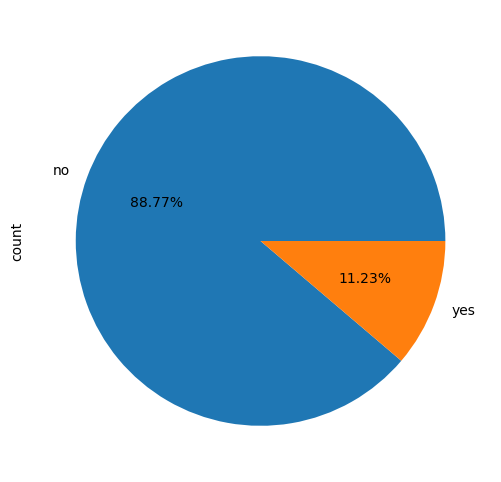

y
no     32908
yes     4161
Name: count, dtype: int64

In [20]:
# From the original 37069 records, we found there are 11.23% of customers 
# Do Deposition in ANK after visited.(yes)
df['y'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(6, 6))
plt.show()
df['y'].value_counts()

In [21]:
# For numerical data, the index of results includes counts, mean values, 
# standard deviations, minimum values, three percentiles and maximum values.
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.043783,258.374868,2.573552,962.543419,0.172570,0.082759,93.575098,-40.502147,3.622370,5167.150813
std,10.395798,260.203020,2.786845,186.740644,0.494031,1.571270,0.579297,4.630409,1.733892,72.168914
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
# For object and bool data, the automatically calculated fields are count (non-null value)
# ,unique (unique value), top (highest frequency) and freq (highest frequency).
df.describe(include=['object','bool'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9380,22426,10931,29301,19447,30595,23506,12351,7757,32018,32908


In [26]:
# People with a duration of ZERO will definitely not save in the future,
# so these lines of data need to be deleted.
df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6357,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
20340,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
23701,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28288,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no


In [28]:
#delete the record that the call duration is zero
df.drop(df.index[(df['duration']==0)],inplace=True)
df1 = df.copy()
df.shape

(37065, 21)

In [30]:
# Map the Dependent-variable (yes or no) to a Dummy-variable (0 or 1).
df.loc[df['y']=='no','y']=0
df.loc[df['y']=='yes','y']=1
y=pd.get_dummies(df['y'],columns=['y'],prefix=['y'],drop_first=True)

## __1.1 Bank client data Analisys and Categorical Treatment__

To make things more clear, I'm going to creat a new datasets that contains just this part of data

In [32]:
# In order to better analyze the data, we separately extract the data of 0~7 rows 
# in the dataset, which constitutes a sub-dataset of customer information.
bank_client=df.iloc[:,0:7]

In [34]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,32,management,married,professional.course,unknown,no,no
1,41,admin.,married,high.school,no,yes,yes
2,32,admin.,married,university.degree,no,yes,no
3,37,admin.,married,high.school,no,unknown,unknown
4,38,admin.,divorced,university.degree,no,no,no


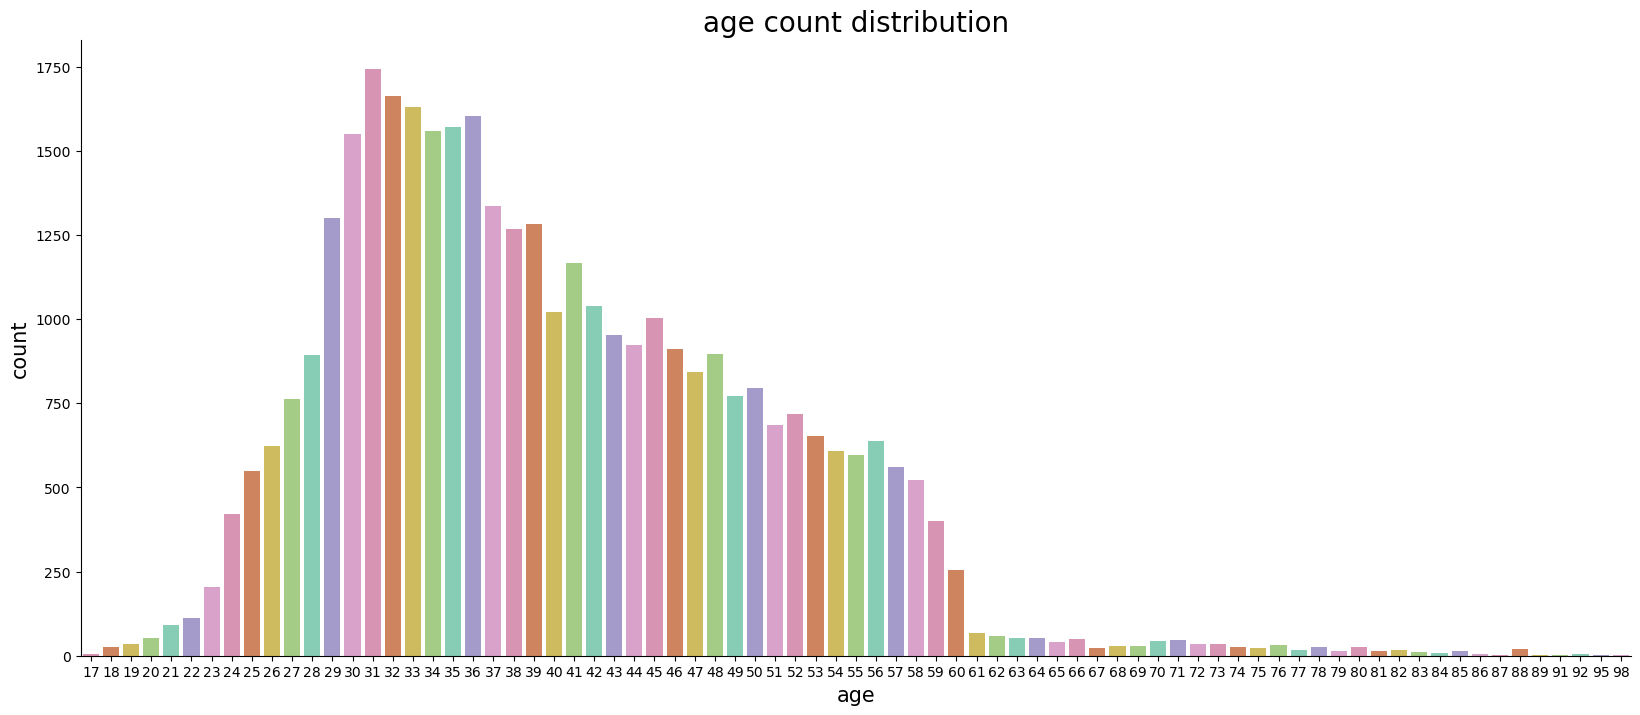

In [36]:
fig, ax = plt.subplots() 
fig.set_size_inches(20, 8)
# Define a custom color palette (list of colors)
colors = ['#E389B2', '#E07F4C', '#E0C74C', '#A2D77C', '#7CD7B9', '#A093D2', '#E199CE'] 
# Apply the custom palette to the countplot
sns.countplot(x='age', data=bank_client, palette=colors)
ax.set_xlabel('age', fontsize=15) 
ax.set_ylabel('count', fontsize=15)
ax.set_title('age count distribution', fontsize=20)
sns.despine() 
plt.show()

In [38]:
print('1st Quartile: ',bank_client['age'].quantile(q=0.25))
print('2nd Quartile: ',bank_client['age'].quantile(q=0.50))
print('3rd Quartile: ',bank_client['age'].quantile(q=0.75))
print('4th Quartile: ',bank_client['age'].quantile(q=1.0))

print('Age above: ',bank_client['age'].quantile(q=0.75)+1.5*(bank_client['age'].quantile(q=0.75)-bank_client['age'].quantile(q=0.25)),'are outliers')

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
Age above:  69.5 are outliers


In [40]:
# age Proportion of outliers
print('number of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count() * 100 / len(bank_client), 2), '%')

# The mean value of the age.
print('MEAN:', round(df['age'].mean(), 1))

number of outliers:  419
Number of clients:  37065
Outliers are: 1.13 %
MEAN: 40.0


In [42]:
bank_client_temp=bank_client.copy()

In [44]:
def quartileMap(data,column_name):
    q1=data[column_name].quantile(q=0.25)
    q2=data[column_name].quantile(q=0.50)
    q3=data[column_name].quantile(q=0.75)
    q_lower=q1-1.5*(q3-q1)
    q_upper=q3-1.5*(q3-q1)
    print(q1,q2,q3,q_lower,q_upper)

    data.loc[data[column_name]<q_lower,column_name]=0
    data.loc[(data[column_name]>=q_lower)& (data[column_name]<q1),column_name]=1
    data.loc[(data[column_name]>=q1)& (data[column_name]<q2),column_name]=2
    data.loc[(data[column_name]>=q2)& (data[column_name]<q3),column_name]=3
    data.loc[(data[column_name]>=q3)& (data[column_name]<q_upper),column_name]=4
    data.loc[data[column_name] > q_upper, column_name] = 5
    return data

In [46]:
#to age
quartileMap(bank_client_temp,'age')
bank_client_temp.head()

32.0 38.0 47.0 9.5 24.5


,age,job,marital,education,default,housing,loan
0,2,management,married,professional.course,unknown,no,no
1,3,admin.,married,high.school,no,yes,yes
2,2,admin.,married,university.degree,no,yes,no
3,2,admin.,married,high.school,no,unknown,unknown
4,3,admin.,divorced,university.degree,no,no,no


<Figure size 640x480 with 0 Axes>

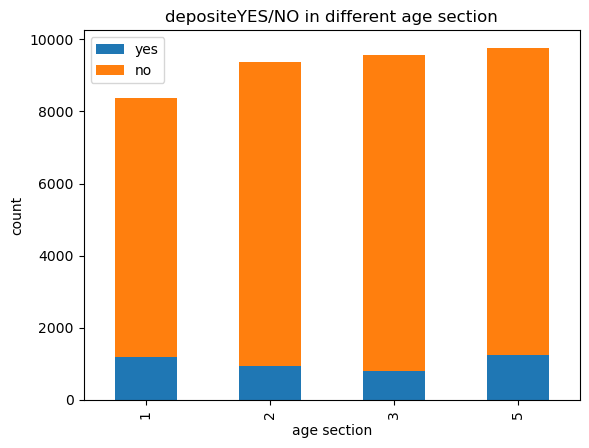

'YES in age'    percentage/%

age
1    14.311313
2     9.903846
3     8.246237
5    12.768790
Name: count, dtype: float64


In [48]:
#The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig=plt.figure()
fig.set(alpha=0.2)

y_0 = bank_client_temp.age[df.y == 0].value_counts()
y_1 = bank_client_temp.age[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different age section")
plt.xlabel(u"age section")
plt.ylabel(u"count")
plt.show()
#The chart below reflects that different duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in age'    percentage/%")
print("")
yes_in_age = y_1 / (bank_client_temp.age.value_counts()) * 100
print(yes_in_age)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ

In [50]:
#understanding classification variables
print('job:\n',bank_client['job'].unique())
print('marital\n', bank_client['marital'].unique())
print('education\n', bank_client['education'].unique())
print('default\n', bank_client['default'].unique())
print('housing\n', bank_client['housing'].unique())
print('loan\n', bank_client['loan'].unique())

job:
 ['management' 'admin.' 'blue-collar' 'services' 'technician' 'retired'
 'unemployed' 'housemaid' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
 ['married' 'divorced' 'single' 'unknown']
education
 ['professional.course' 'high.school' 'university.degree' 'basic.9y'
 'basic.4y' 'unknown' 'basic.6y' 'illiterate']
default
 ['unknown' 'no' 'yes']
housing
 ['no' 'yes' 'unknown']
loan
 ['no' 'yes' 'unknown']


<Figure size 640x480 with 0 Axes>

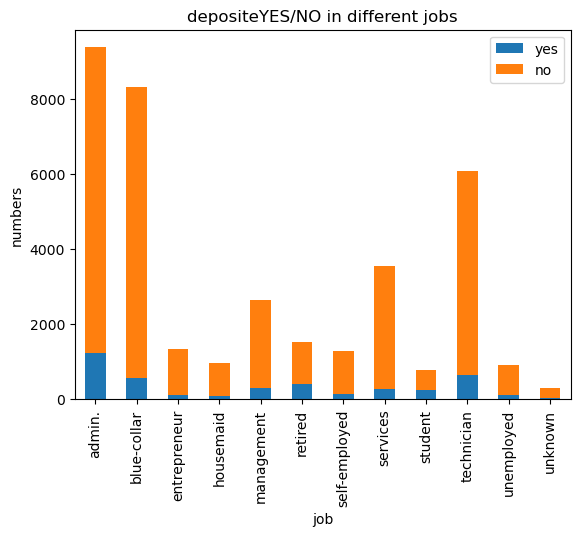

'YES in jobs'    percentage/%

job
admin.           13.018445
blue-collar       6.915596
entrepreneur      8.754717
housemaid        10.134436
management       11.115312
retired          25.716146
self-employed    10.031348
services          7.936955
student          31.619537
technician       10.617284
unemployed       13.686534
unknown          12.162162
Name: count, dtype: float64


In [52]:
#the picture below showa that in different occupations,the ratio customers choose between saving and not saving
fig=plt.figure()
fig.set(alpha=0.2)

y_0=df.job[df.y==0].value_counts()
y_1=df.job[df.y==1].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different jobs")
plt.xlabel(u"job")
plt.ylabel(u"numbers")
plt.show()

#the chart below reflects that diffrent jobs have the different ratio of Do or Not Depostion in ANZ.

print("'YES in jobs'    percentage/%")
print("")
yes_in_jobs = y_1 / (df.job.value_counts()) * 100
print(yes_in_jobs)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.

<Figure size 640x480 with 0 Axes>

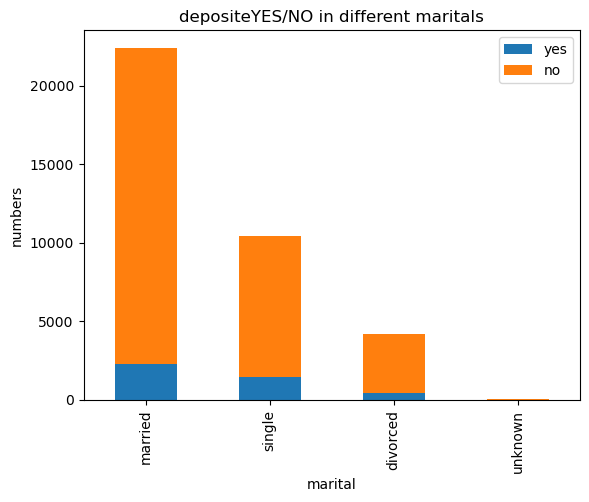

'YES in jobs'    percentage/%

job
admin.           13.018445
blue-collar       6.915596
entrepreneur      8.754717
housemaid        10.134436
management       11.115312
retired          25.716146
self-employed    10.031348
services          7.936955
student          31.619537
technician       10.617284
unemployed       13.686534
unknown          12.162162
Name: count, dtype: float64


In [54]:
#the picture belows shows that in diffrent marital,the ratio consumers choose to between saving and not saving
fig=plt.figure()
fig.set(alpha=0.2)

y_0=df.marital[df.y==0].value_counts()
y_1=df.marital[df.y==1].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different maritals")
plt.xlabel(u"marital")
plt.ylabel(u"numbers")
plt.show()

#the chart below reflects that diffrent marital situation have the different ratio of Do or Not Depostion in ANZ.

print("'YES in jobs'    percentage/%")
print("")
yes_in_marital = y_1 / (df.marital.value_counts()) * 100
print(yes_in_jobs)
# The ratio of costomers in different marital situations that Do Depostion in the end.
# And the graph told us that "single" person are willing to Do Depostion in ANZ.

<Figure size 640x480 with 0 Axes>

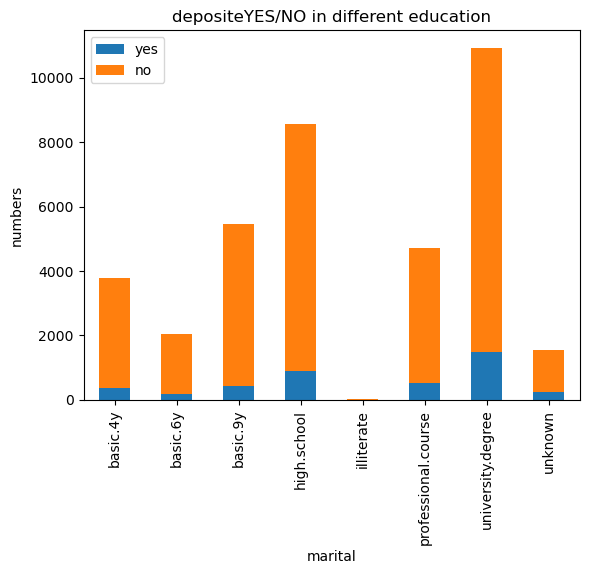

'YES in education'    percentage/%

education
basic.4y               10.052770
basic.6y                8.349515
basic.9y                8.002937
high.school            10.639542
illiterate             25.000000
professional.course    11.403695
university.degree      13.595608
unknown                15.073765
Name: count, dtype: float64


In [56]:
#the picture belows shows that in diffrent education levels, the ratio consumers choose to between saving and not saving
fig=plt.figure()
fig.set(alpha=0.2)

y_0=df.education[df.y==0].value_counts()
y_1=df.education[df.y==1].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different education")
plt.xlabel(u"marital")
plt.ylabel(u"numbers")
plt.show()

#the chart below reflects that diffrent education have the different ratio of Do or Not Depostion in ANZ.

print("'YES in education'    percentage/%")
print("")
yes_in_education = y_1 / (df.education.value_counts()) * 100
print(yes_in_education)
# The ratio of costomers in different education that Do Depostion in the end.
# And the graph told us that "single" person are willing to Do Depostion in ANZ.

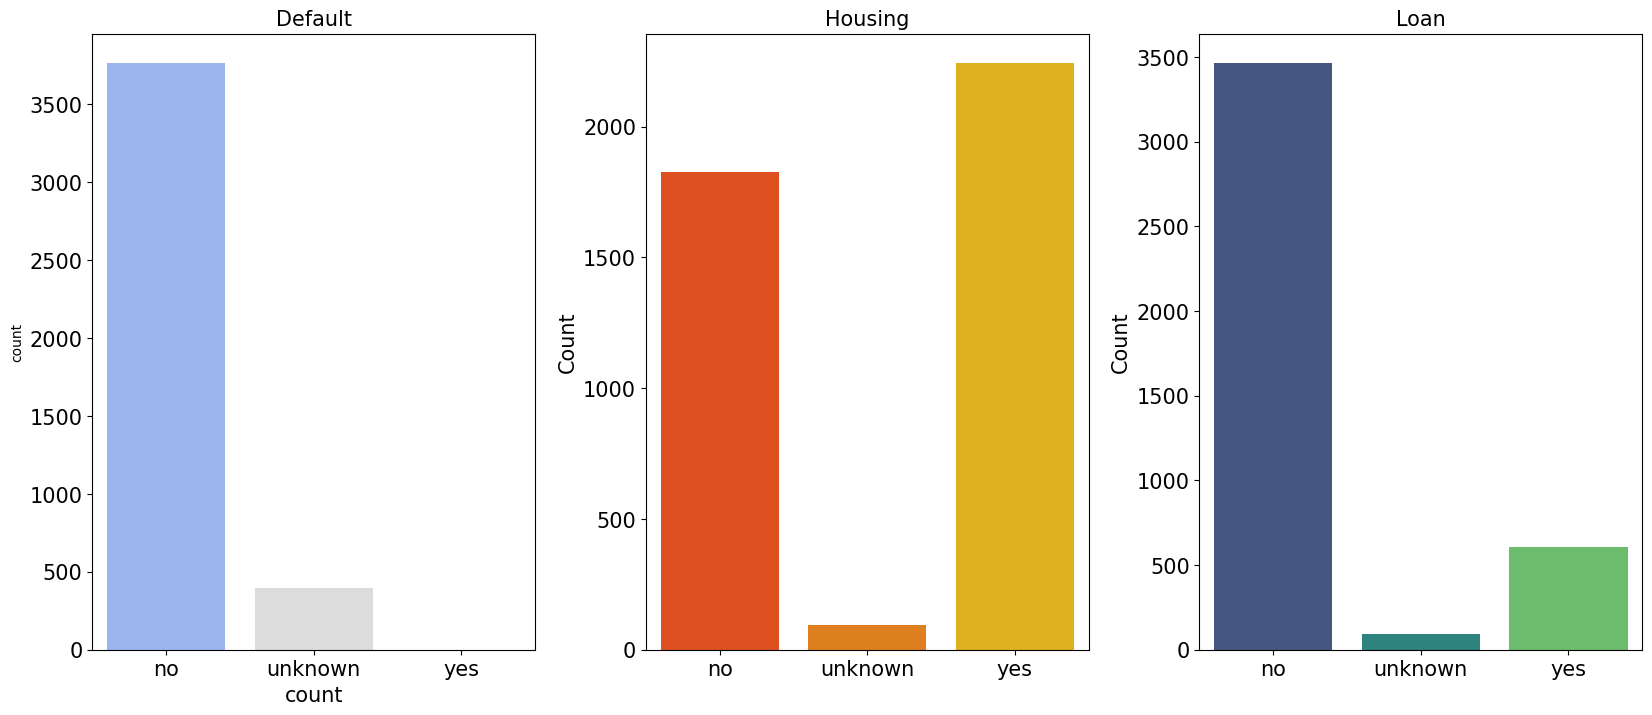

In [58]:
#Check the credit status of customers who will make deposits, and the distribution of housing loans and personal loans

# Define color palettes for each plot
default_palette = sns.color_palette("coolwarm", 3)  # Cool to warm colors
housing_palette = sns.color_palette("autumn", 3)    # Autumn tones
loan_palette = sns.color_palette("viridis", 3)      # Green to blue tones

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
sns.countplot(x="default",data=bank_client[df['y']==1],ax=ax1,order=['no','unknown','yes'], palette=default_palette)
ax1.set_title('Default',fontsize=15)
ax1.set_xlabel('')
ax1.set_xlabel('count',fontsize=15)
ax1.tick_params(labelsize=15)

# Housing
sns.countplot(x='housing', data=bank_client[df['y'] == 1], ax=ax2, order=['no', 'unknown', 'yes'],palette=housing_palette)
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan
sns.countplot(x='loan', data=bank_client[df['y'] == 1], ax=ax3, order=['no', 'unknown', 'yes'],palette=loan_palette)
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [59]:
#Discrete column values of bank customer data are converted to continuous values
# Labels are encoded in alphabetical order

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])

In [60]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,32,4,1,5,1,0,0
1,41,0,1,3,0,2,2
2,32,0,1,6,0,2,0
3,37,0,1,3,0,1,1
4,38,0,0,6,0,0,0


### __1.2 Relatede with the last contact of the current campaign__

Treate categorical, see those values<br>
group continuous variables if necessary

In [64]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = df.iloc[:, 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,cellular,jul,mon,565
1,cellular,apr,mon,982
2,cellular,may,mon,188
3,cellular,jul,thu,56
4,cellular,jul,tue,419


In [66]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q=0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q=0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q=0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q=1.00))
#Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Duration calls above: ', bank_related['duration'].quantile(q=0.75) +
      1.5 * (bank_related['duration'].quantile(q=0.75) - bank_related['duration'].quantile(q=0.25)), 'are outliers')

# Proportion of airtime outliers
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:',
      round(bank_related[bank_related['duration'] > 644.5]['duration'].count() * 100 / len(bank_related), 2), '%')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  320.0
4º Quartile:  4918.0
Duration calls above:  647.0 are outliers
Numerber of outliers:  2674
Number of clients:  37065
Outliers are: 7.21 %


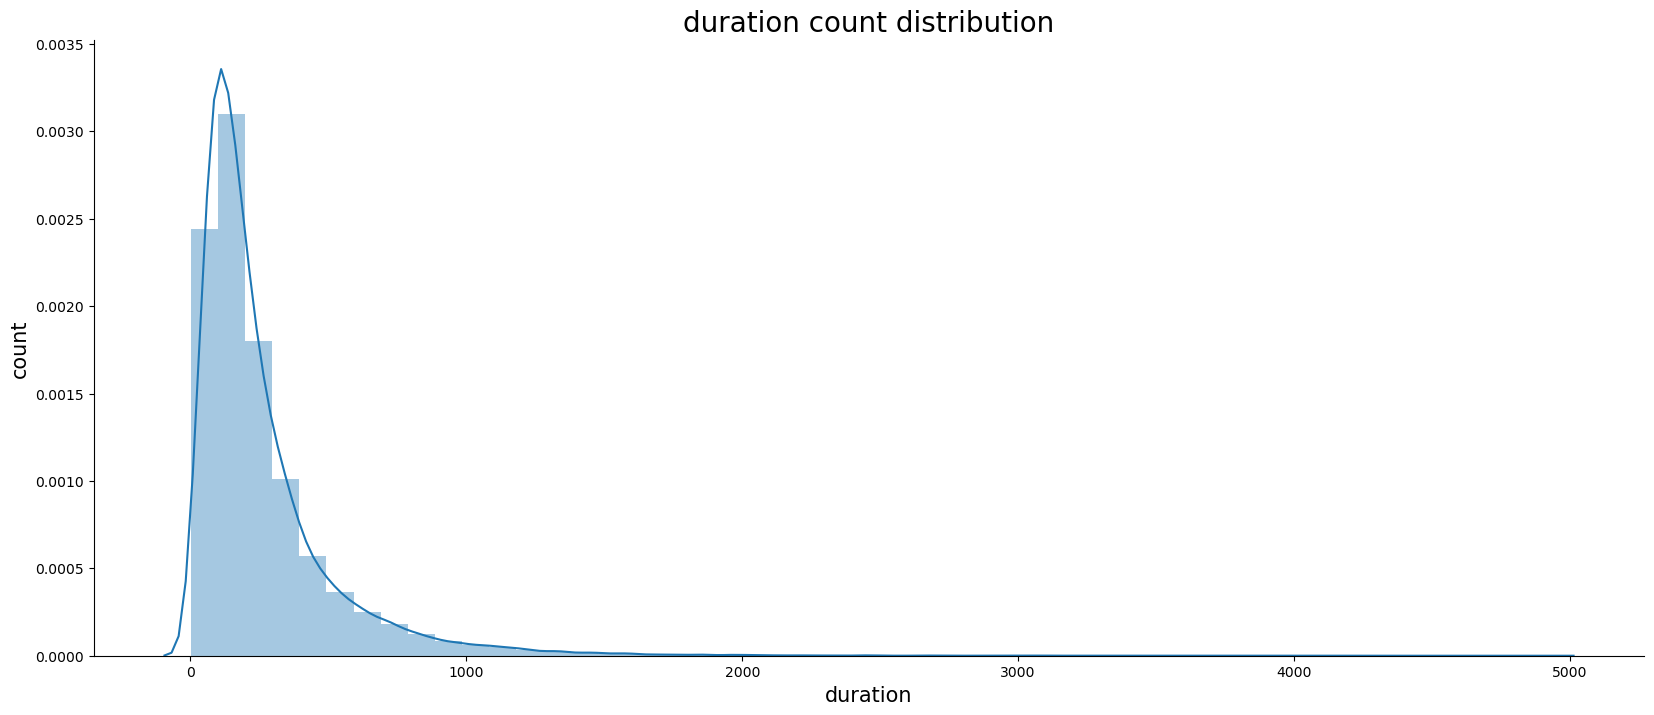

In [68]:
# The duration distribution of the sample dataset.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.distplot(bank_related['duration'])
ax.set_xlabel('duration', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('duration count distribution', fontsize=20)
sns.despine()

In [70]:
bank_related_temp=bank_related.copy()

In [72]:
#to duration
quartileMap(bank_related_temp,'duration')
bank_related_temp.head()

102.0 180.0 320.0 -225.0 -7.0


,contact,month,day_of_week,duration
0,cellular,jul,mon,5
1,cellular,apr,mon,5
2,cellular,may,mon,5
3,cellular,jul,thu,5
4,cellular,jul,tue,5


<Figure size 640x480 with 0 Axes>

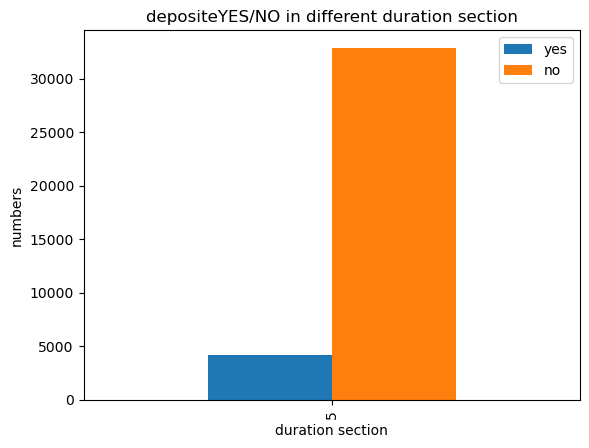

'YES in duration'    percentage/%

duration
5    11.226224
Name: count, dtype: float64


In [74]:
#the picture below says that in different occupations, the ratio customers choose to between the savings and not savings
fig=plt.figure()
fig.set(alpha=0.2)

y_0=bank_related_temp.duration[df.y==0].value_counts()
y_1=bank_related_temp.duration[df.y==1].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar')
plt.title(u"depositeYES/NO in different duration section")
plt.xlabel(u"duration section")
plt.ylabel(u"numbers")
plt.show()

#the chart below reflects that diffrent duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in duration'    percentage/%")
print("")
yes_in_duration = y_1 / (bank_related_temp.duration.value_counts()) * 100
print(yes_in_duration)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.

<Figure size 640x480 with 0 Axes>

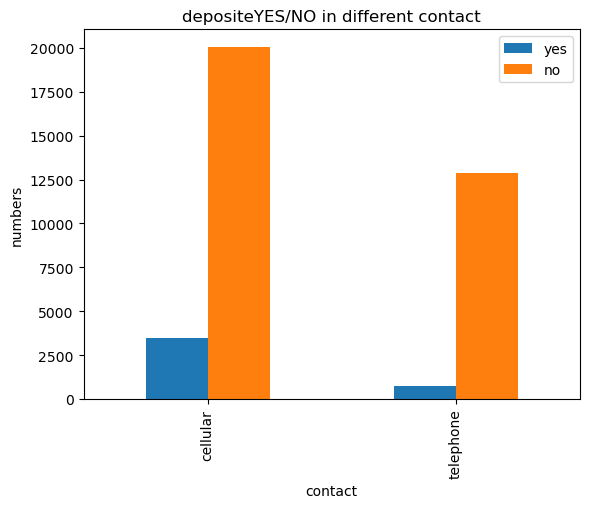

'YES in contact'    percentage/%

contact
cellular     14.674722
telephone     5.249963
Name: count, dtype: float64


In [76]:
#the picture below says that in different occupations, the ratio customers choose to between the savings and not savings
fig=plt.figure()
fig.set(alpha=0.2)

y_0=bank_related_temp.contact[df.y==0].value_counts()
y_1=bank_related_temp.contact[df.y==1].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar')
plt.title(u"depositeYES/NO in different contact")
plt.xlabel(u"contact")
plt.ylabel(u"numbers")
plt.show()

#the chart below reflects that diffrent duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in contact'    percentage/%")
print("")
yes_in_contact = y_1 / (bank_related_temp.contact.value_counts()) * 100
print(yes_in_contact)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.

In [78]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['cellular' 'telephone']

Which monthis this campaing work: 
 ['jul' 'apr' 'may' 'jun' 'nov' 'aug' 'oct' 'sep' 'dec' 'mar']

Which days of week this campaing work: 
 ['mon' 'thu' 'tue' 'wed' 'fri']


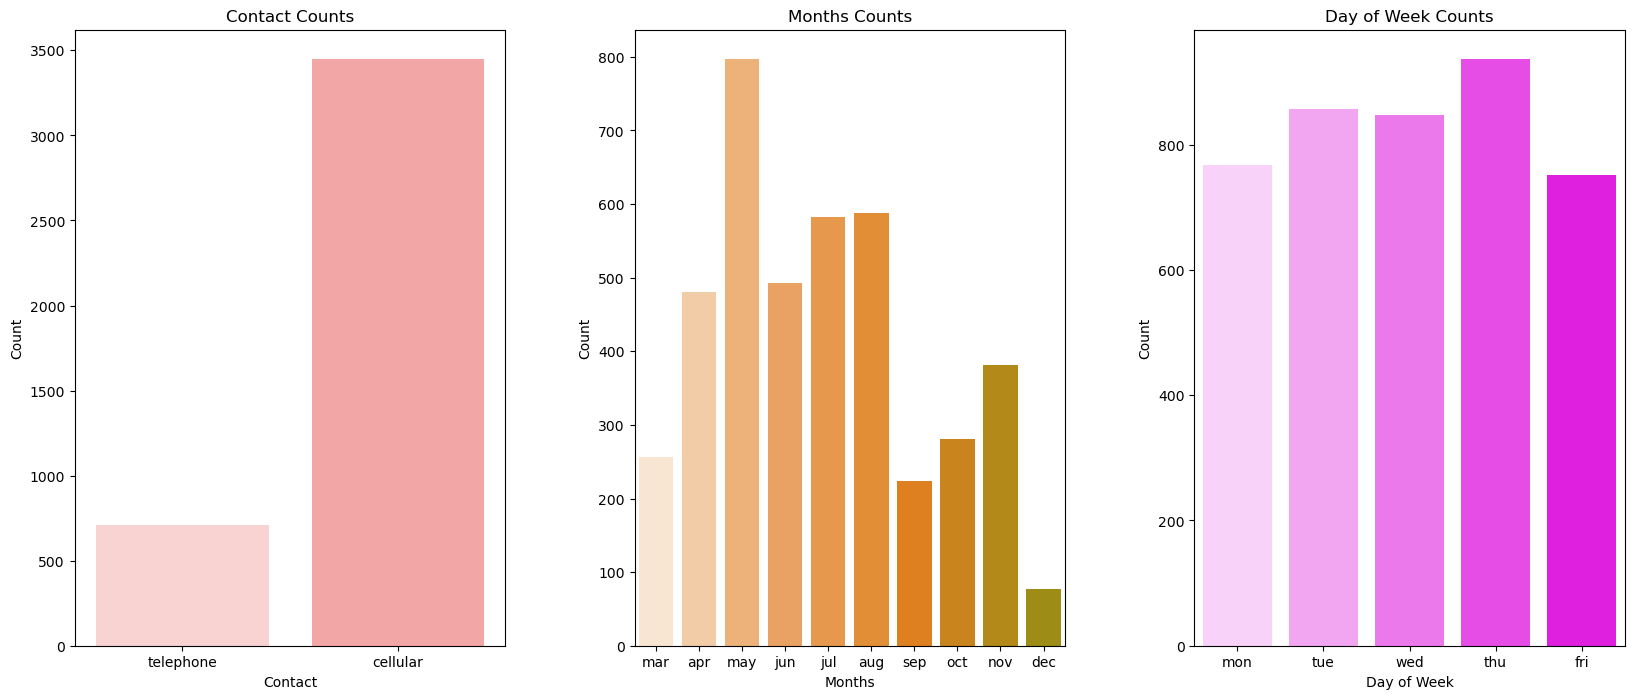

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palettes with warm, pleasing tones
contact_palette = ['#FFCCCC', '#FF9999', '#FF6666']  # Soft red tones
months_palette = ['#FFE6CC', '#FFCC99', '#FFB266', '#FFA04D', '#FF9933', '#FF8F1A', '#FF8000', '#E68A00', '#CC9400', '#B39D00']  # Warm amber tones
day_palette = ['#FFCCFF', '#FF99FF', '#FF66FF', '#FF33FF', '#FF00FF']       # Soft pastel tones for a gentle look

# Create subplots with bars displayed vertically (default behavior)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Contact Counts
sns.countplot(x=bank_related['contact'][df['y'] == 1], ax=ax1, palette=contact_palette)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Counts', fontsize=12)
ax1.tick_params(labelsize=10)

# Months Counts
sns.countplot(x=bank_related['month'][df['y'] == 1], ax=ax2, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette=months_palette)
ax2.set_xlabel('Months', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Months Counts', fontsize=12)
ax2.tick_params(labelsize=10)

# Day of Week Counts
sns.countplot(x=bank_related['day_of_week'][df['y'] == 1], ax=ax3, order=['mon', 'tue', 'wed', 'thu', 'fri'], palette=day_palette)
ax3.set_xlabel('Day of Week', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_title('Day of Week Counts', fontsize=12)
ax3.tick_params(labelsize=10)

# Adjust layout to avoid overlap
plt.subplots_adjust(wspace=0.3)
plt.show()


In [84]:
#Encode the tag values
#The label encoder order is in alphabetical order
labelencoder_X = LabelEncoder()
bank_related['contact'] = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month'] = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [86]:
bank_related.head()

,contact,month,day_of_week,duration
0,0,3,1,565
1,0,0,1,982
2,0,6,1,188
3,0,3,2,56
4,0,3,3,419


### __1.3 Social and economic context attributes__

In [88]:
# Social and economic context attributes
bank_se = df.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.4,93.918,-42.7,4.962,5228.1
1,-1.8,93.075,-47.1,1.405,5099.1
2,-1.8,92.893,-46.2,1.299,5099.1
3,1.4,93.918,-42.7,4.968,5228.1
4,1.4,93.918,-42.7,4.961,5228.1


### __1.4 Other attributes__

In [90]:
# Other Attributes
bank_o = df.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,4,999,0,nonexistent
1,1,999,0,nonexistent
2,2,999,0,nonexistent
3,3,999,0,nonexistent
4,8,999,0,nonexistent


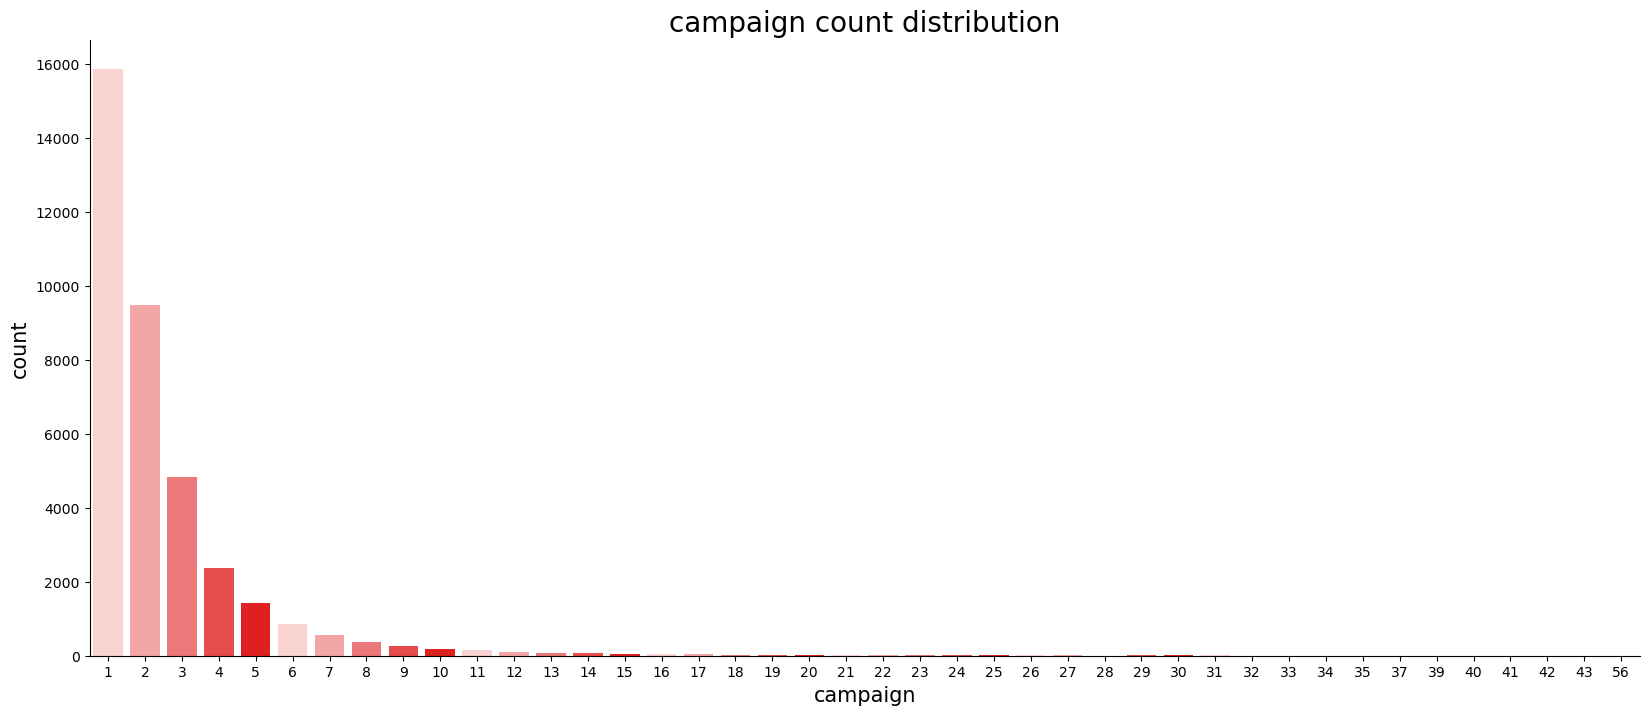

In [96]:
# The camgaign distribution of the sample dataset.
campaign_palette = ['#FFCCCC', '#FF9999', '#FF6666', '#FF3333', '#FF0000']  # Soft to deep red tones
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='campaign', data=bank_o,palette=campaign_palette)
ax.set_xlabel('campaign', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('campaign count distribution', fontsize=20)
sns.despine()

In [98]:
print('1st Quartile: ', bank_o['campaign'].quantile(q=0.25))
print('2nd Quartile:', bank_o['campaign'].quantile(q=0.50))
print('3rd Qartile:', bank_o['campaign'].quantile(q=0.75))
print('4th Quartile:', bank_o['campaign'].quantile(q=1.0))

1st Quartile:  1.0
2nd Quartile: 2.0
3rd Qartile: 3.0
4th Quartile: 56.0


In [100]:
print('Duration calls above: ', bank_o['campaign'].quantile(q=0.75) +
      1.5 * (bank_o['campaign'].quantile(q=0.75) - bank_o['campaign'].quantile(q=0.25)), 'are outliers')
#Percentage of campaign outliers
print('Number of outliers: ',bank_o[bank_o['campaign']>6.0]['campaign'].count())
print('Number of clients: ', len(bank_o))
#Outliers in %
print('Outliers are:',
      round(bank_o[bank_o['campaign'] > 6.0]['campaign'].count() * 100 / len(bank_o), 2), '%')

Duration calls above:  6.0 are outliers
Number of outliers:  2186
Number of clients:  37065
Outliers are: 5.9 %


In [102]:
print(bank_o['poutcome'].unique())

['nonexistent' 'failure' 'success']


In [104]:
#Encode the poutcome
labelencoder_X = LabelEncoder()
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])

In [106]:
bank_o.head()

,campaign,pdays,previous,poutcome
0,4,999,0,1
1,1,999,0,1
2,2,999,0,1
3,3,999,0,1
4,8,999,0,1


### __1.5 Concat the Processed Dataset__

In [112]:
#Concat the Processed Dataset
bank_final = pd.concat([bank_client, bank_related, bank_se, bank_o], axis=1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                         'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                         'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous',
                         'poutcome']]
bank_final.shape

(37065, 20)

In [114]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,32,4,1,5,1,0,0,0,3,1,565,1.4,93.918,-42.7,4.962,5228.1,4,999,0,1
1,41,0,1,3,0,2,2,0,0,1,982,-1.8,93.075,-47.1,1.405,5099.1,1,999,0,1
2,32,0,1,6,0,2,0,0,6,1,188,-1.8,92.893,-46.2,1.299,5099.1,2,999,0,1
3,37,0,1,3,0,1,1,0,3,2,56,1.4,93.918,-42.7,4.968,5228.1,3,999,0,1
4,38,0,0,6,0,0,0,0,3,3,419,1.4,93.918,-42.7,4.961,5228.1,8,999,0,1


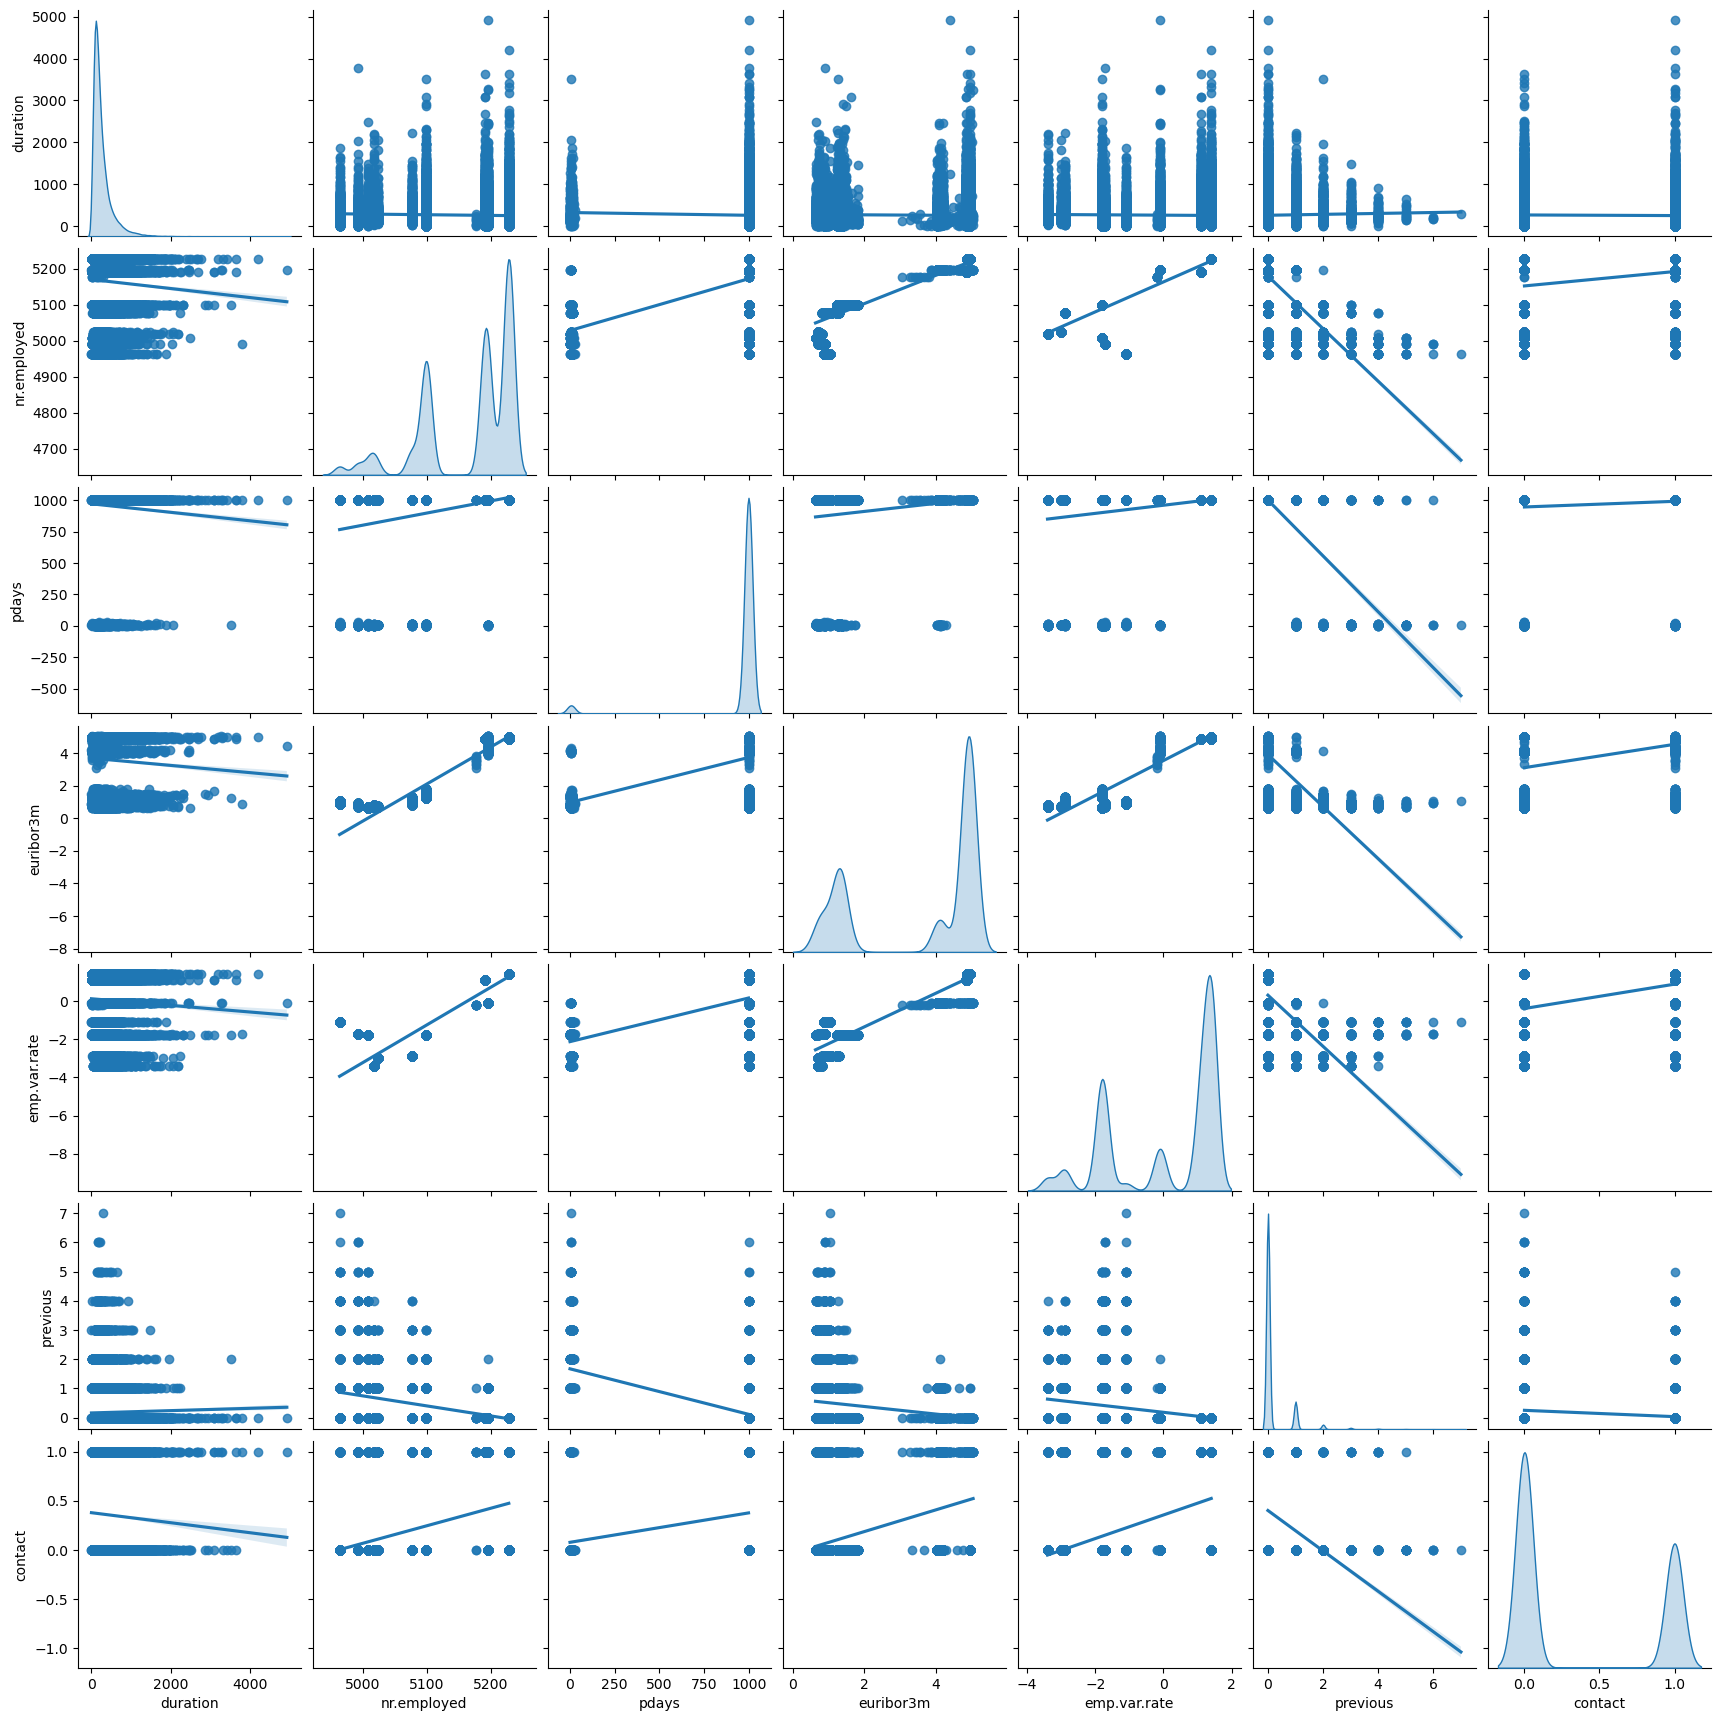

In [120]:
sns.pairplot(bank_final, diag_kind='kde', kind='reg',
             vars=['duration', 'nr.employed','pdays', 'euribor3m',  'emp.var.rate', 'previous', 'contact'])

<Axes: title={'center': 'Pearson Correlation of Features'}>

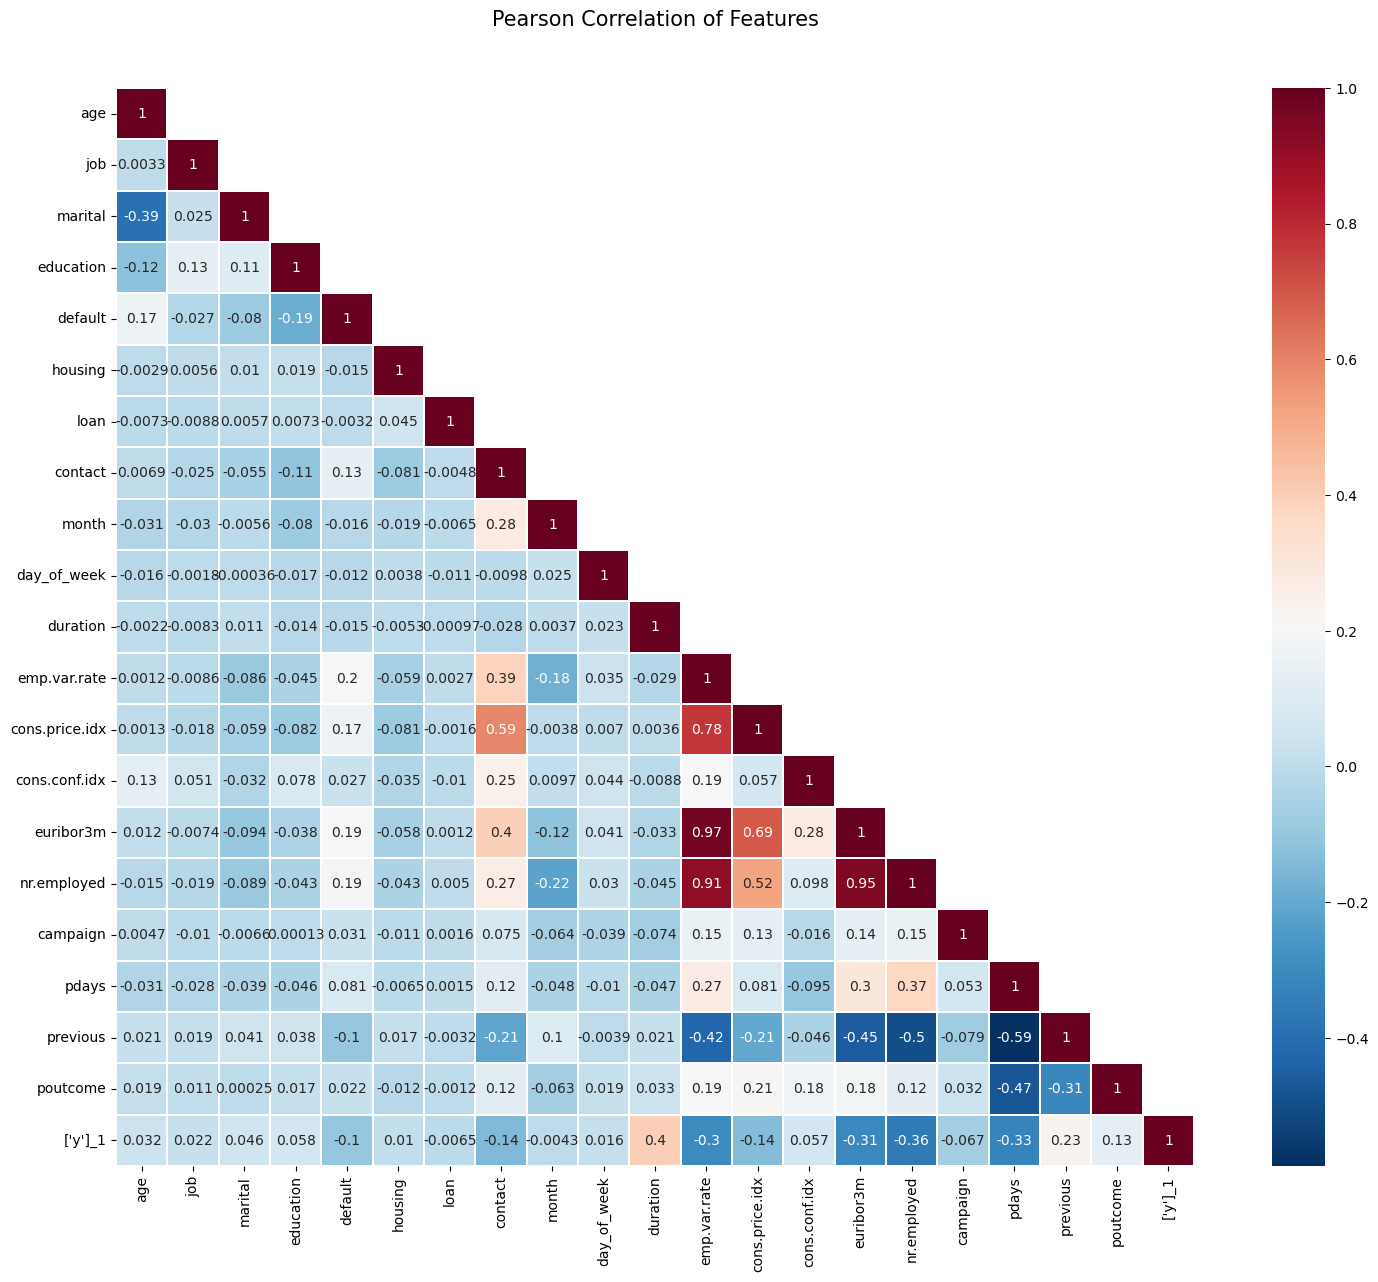

In [122]:
#Pearson correlation coefficient between features
#Correlation coefficient classification (same for negative numbers)
#0.8-1.0 is extremely correlated
#0.6-0.8 Strong correlation
#0.4-0.6 moderately relevant
#0.2-0.4 Weak correlation
#0.0-0.2 Very weakly correlated or non-correlated
cor_mat = pd.concat([bank_final, y], axis=1).corr()
#colormap = plt.cm.viridis
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=cor_mat, linewidths=0.1, cmap='RdBu_r', vmax=1.0, mask=mask, square=True, linecolor='white',
            annot=True, cbar=True)

In [124]:
#Based on the Pearson correlation coefficient above, some culling is done for features that have a strong or strong correlation between different features
#Because the stronger the correlation (i.e., the more linear the correlation), the more they can be seen as a feature
bank_final.drop(['emp.var.rate', 'cons.price.idx'], axis=1, inplace=True)
bank_final.shape

(37065, 18)

<Axes: title={'center': 'Pearson Correlation of Features'}>

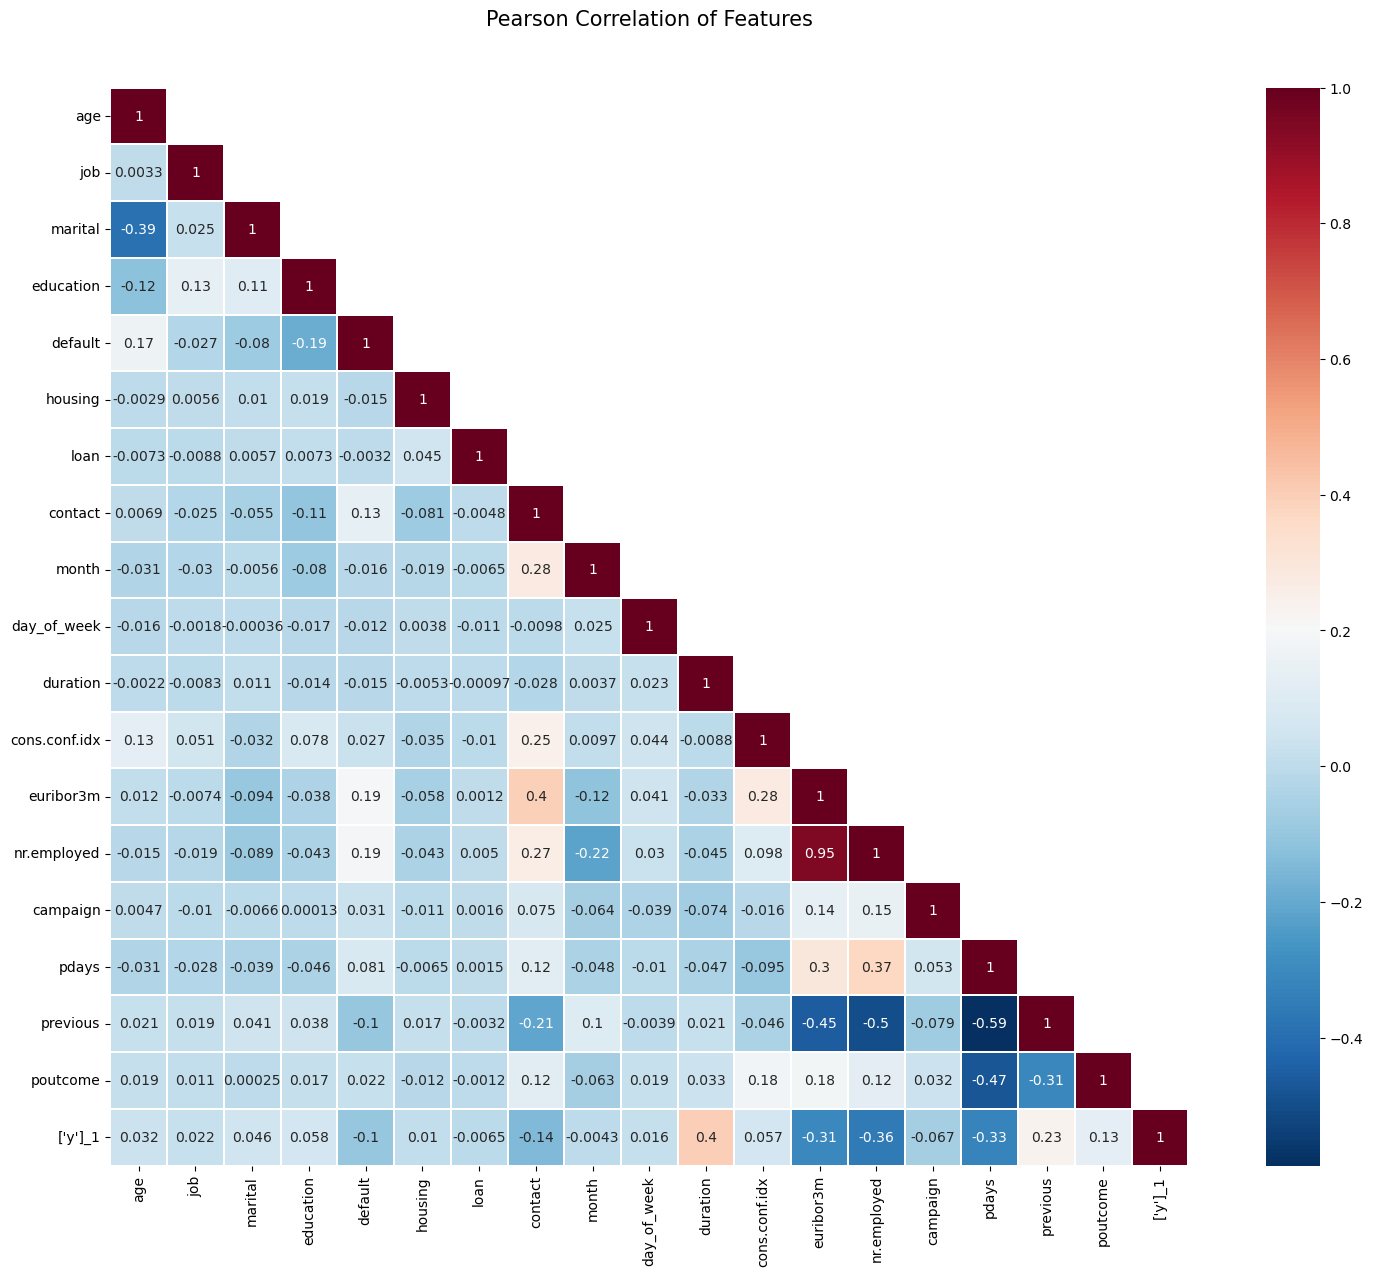

In [126]:
#The Pearson correlation coefficient after treatment was observed again
#It has been found that there is no strong or strong correlation between the two features
cor_mat = pd.concat([bank_final, y], axis=1).corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=cor_mat, linewidths=0.1, cmap='RdBu_r', vmax=1.0, mask=mask, square=True, linecolor='white',
            annot=True, cbar=True)

# __2. Modeling__

## The first layer

## Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier

## The second layer

## Gradient Boosting Classifier

In [128]:
X_final = bank_final.values
y_final = y.values

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, random_state=0, test_size=0.2)

In [132]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [142]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#from xgboost import XGBClassifier  # Uncomment if you're using XGBoost
n_folds = 10
clfs = [
    LogisticRegression(random_state=1),
    # AdaBoostClassifier(n_estimators=500, learning_rate=0.1),
    # ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini'),
    # KNeighborsClassifier(n_neighbors=2),
    # SVC(kernel='linear', C=0.025, probability=True),
    # ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
    # XGBClassifier(n_estimators=100, max_depth=6, min_child_weight=2, gamma=0.9, subsample=0.8),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
    GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=100)
]

print("Creating train and test sets for stacking.")
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))

kf = KFold(n_splits=n_folds, shuffle=True, random_state=100)

for j, clf in enumerate(clfs):
    print(j + 1, clf)
    dataset_blend_test_j = np.zeros((X_test.shape[0], n_folds))
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        print("Fold", i, end='\t')
        X_train_b, X_test_b = X_train[train_index], X_train[test_index]
        y_train_b, y_test_b = y_train[train_index], y_train[test_index]
        clf.fit(X_train_b, y_train_b)
        y_submission = clf.predict_proba(X_test_b)[:, 1]
        dataset_blend_train[test_index, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_test)[:, 1]
    print()
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(axis=1)

n = 0
y_test_pred_proba = np.zeros((X_test.shape[0], len(clfs)))
for model in clfs:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba[:, n] = model.predict_proba(X_test)[:, 1]
    print("Model %d, Accuracy %0.6f." % (n, accuracy_score(y_test, y_test_pred)))
    n += 1


Creating train and test sets for stacking.
1 LogisticRegression(random_state=1)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
2 RandomForestClassifier(criterion='entropy', n_jobs=-1)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
3 GradientBoostingClassifier(learning_rate=0.05, max_depth=6, subsample=0.5)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
Model 0, Accuracy 0.916093.
Model 1, Accuracy 0.915014.
Model 2, Accuracy 0.920545.


In [144]:
#Model fusion
print("Stacking.")
logmodel = GradientBoostingClassifier()
logmodel.fit(dataset_blend_train, y_train)
y_score = logmodel.predict(dataset_blend_test)
print("Stacking Accuracy %0.6f." % accuracy_score(y_test, y_score))

Stacking.
Stacking Accuracy 0.922838.


# __3. Evaluation__

### 3.1 ROC Curve and AUC

__Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.<br>
A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:__

.90-1 = excellent (A)<br>

.80-.90 = good (B)<br>

.70-.80 = fair (C)<br>

.60-.70 = poor (D)<br>

.50-.60 = fail (F)

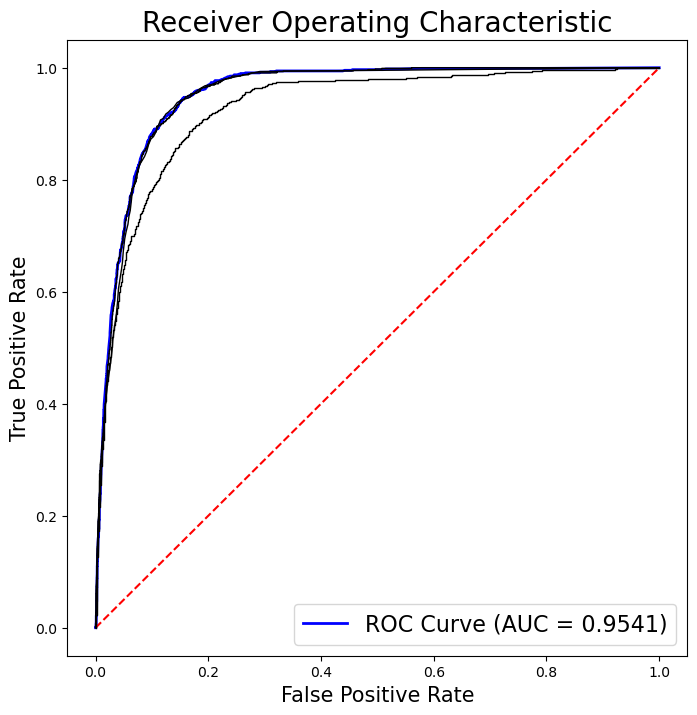

In [150]:
from sklearn.metrics import roc_curve, auc

# The Receiver Operating Characteristic & Area Under the Curve

fig, ax = plt.subplots(figsize=(8, 8))

#Linear regression and the predictions of each of the above models (probability matrix) are used to predict new probability outcomes
probs = logmodel.predict_proba(dataset_blend_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)  #Calculate the true rate and false positive rate
roc_auc = auc(fpr, tpr)  #Calculate AUC

ax.plot(fpr, tpr, 'b', lw=2, label='ROC Curve (AUC = %0.4f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'r--')
for i in range(len(clfs)):
    fpri,tpri,thresholdi=roc_curve(y_test,y_test_pred_proba[:,i])
    roc_auc=auc(fpri,tpri)
    ax.plot(fpri,tpri,'b',lw=1,color='black')
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.legend(loc='lower right', prop={'size': 16})

# __3.2 Analyzing the results__

### __So now we have to decide which one is the best model, and we have two types of wrong values:__

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.<br>
False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.<br>
In my opinion:<br>

The first one its most harmful, because we think that we already have that client but we don't and maybe we lost him in other future campaings The<br> second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client

### So, our objective here, is to find the best model by confusion matrix with the lowest False<br> Positive as possible.

Obs1 - lets go back and look the best confusion matrix that attend this criteria Obs2 - i'll do the math manualy to be more visible and<br> understanding

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, logmodel.predict(dataset_blend_test)))
print('Classification Reports:\n', classification_report(y_test, logmodel.predict(dataset_blend_test)))

Confusion Matrix:
 [[6327  216]
 [ 356  514]]
Classification Reports:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96      6543
        True       0.70      0.59      0.64       870

    accuracy                           0.92      7413
   macro avg       0.83      0.78      0.80      7413
weighted avg       0.92      0.92      0.92      7413



## __PRECISION__

### TN / (TN + FN) [ MATRIX COLUMN 1 ]

For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?

### TP / (FP + TP) [ MATRIX COLUMN 2 ]

For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct ?

## __RECALL__

#### TN / (TN + FP) [MATRIX LINE 1]

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

#### TP / (FN + TP) [MATRIX LINE 2]

For all NEGATIVE(1) REAL VALUES how much we predict crrenct ?

### __F1-SCORE__

F1-score is a "median" of Recall and Precision, consider this when you want a balance between this metrics<br>
f1_0=2(Precison(0) * Recall(0)) / (Precison(0) + Recall(0))<br>
f1_1=2(Precison(1) * Recall(1)) / (Precison(1) + Recall(1))<br>

### __AVG/TOTAL__

This consider the weights of sum of REAL VALUES [line 1] [line 2]<br>
e.g. AVG_precision = precision(0) * (support(0) / support()) + precision(1) * (support(1) / support())